In [1]:
# College ROI Analysis – Project Check-In
# This notebook analyzes the relationship between college tuition, graduation rates, and graduate earnings. It includes exploratory analysis, hypothesis testing, and a simple linear regression model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

# Load the merged dataset
df = pd.read_csv("merged_college_data.csv")

# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   School Name               124 non-null    object 
 1   State                     124 non-null    object 
 2   In-State Tuition          124 non-null    float64
 3   Out-of-State Tuition      124 non-null    float64
 4   Median Earnings (10 yrs)  124 non-null    float64
 5   Acceptance Rate           76 non-null     float64
 6   Student Population        124 non-null    float64
 7   Graduation Rate           122 non-null    float64
 8   SAT Score                 45 non-null     float64
 9   ACT Score                 45 non-null     float64
dtypes: float64(8), object(2)
memory usage: 9.8+ KB


,School Name,State,In-State Tuition,Out-of-State Tuition,Median Earnings (10 yrs),Acceptance Rate,Student Population,Graduation Rate,SAT Score,ACT Score
0,Glendale Community College,AZ,2358.0,8959.0,43108.0,NaN,13480.0,14.0,NaN,NaN
1,Glendale Community College,CA,2358.0,8959.0,41540.0,NaN,13480.0,14.0,NaN,NaN
2,GateWay Community College,AZ,2358.0,8959.0,46147.0,NaN,5123.0,20.0,NaN,NaN
3,Dine College,AZ,1410.0,1410.0,29188.0,NaN,1836.0,5.0,NaN,NaN
4,Rio Salado College,AZ,2358.0,8958.0,41015.0,NaN,18631.0,4.0,NaN,NaN


In [3]:
# Descriptive statistics for Median Earnings
df["Median Earnings (10 yrs)"].describe()

count       124.000000
mean      52308.782258
std       14899.213909
min       29188.000000
25%       41430.500000
50%       45880.500000
75%       61374.750000
max      102772.000000
Name: Median Earnings (10 yrs), dtype: float64

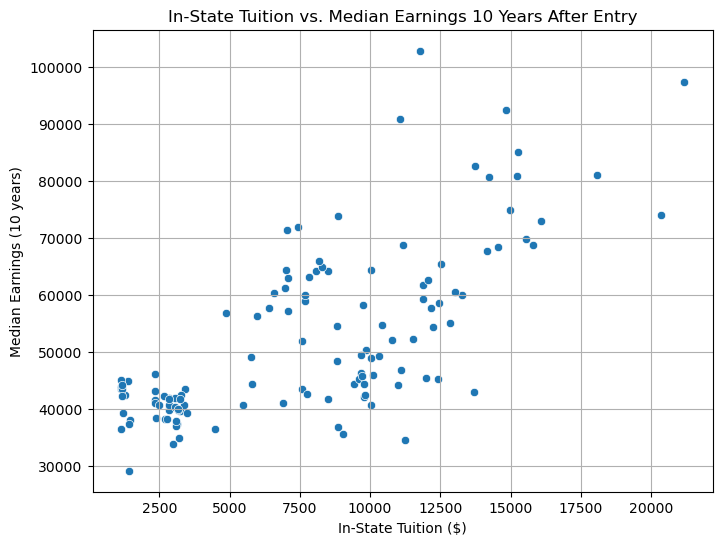

Correlation between In-State Tuition and Median Earnings:0.7086


In [4]:
# Scatterplot of In-State Tuition vs Median Earnings
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="In-State Tuition", y="Median Earnings (10 yrs)")
plt.title("In-State Tuition vs. Median Earnings 10 Years After Entry")
plt.xlabel("In-State Tuition ($)")
plt.ylabel("Median Earnings (10 years)")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df["In-State Tuition"].corr(df["Median Earnings (10 yrs)"])
print(f"Correlation between In-State Tuition and Median Earnings:{correlation:.4f}")

In [5]:
# Define groups
median_tuition = df["In-State Tuition"].median()
high_tuition = df[df["In-State Tuition"] > median_tuition]["Median Earnings (10 yrs)"]
low_tuition = df[df["In-State Tuition"] <= median_tuition]["Median Earnings (10 yrs)"]

# State hypotheses
print("Null Hypothesis: There is no difference in median earnings between high tuition and low tuition schools.")
print("Alternative Hypothesis: There is a difference in median earnings between high tuition and low tuition schools.")

# T-test
t_stat, p_value = stats.ttest_ind(high_tuition, low_tuition, equal_var=False)
print("T-test Statistic:", round(t_stat, 4))
print("P-Value:", round(p_value, 4))

Null Hypothesis: There is no difference in median earnings between high tuition and low tuition schools.
Alternative Hypothesis: There is a difference in median earnings between high tuition and low tuition schools.
T-test Statistic: 6.3711
P-Value: 0.0


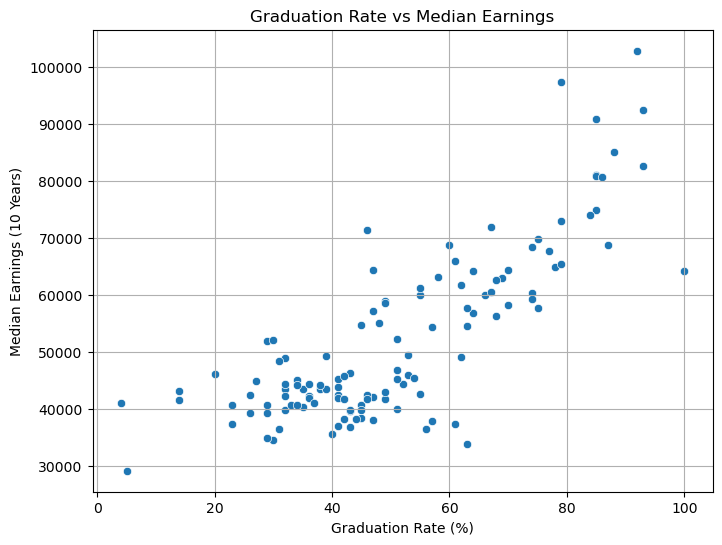

Correlation between Graduation Rate and Median Earnings: 0.8004


In [6]:
# Scatterplot: Graduation Rate vs Median Earnings
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Graduation Rate", y="Median Earnings (10 yrs)")
plt.title("Graduation Rate vs Median Earnings")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Median Earnings (10 Years)")
plt.grid(True)
plt.show()

# Correlation
grad_corr = df["Graduation Rate"].corr(df["Median Earnings (10 yrs)"])
print(f"Correlation between Graduation Rate and Median Earnings: {grad_corr:.4f}")

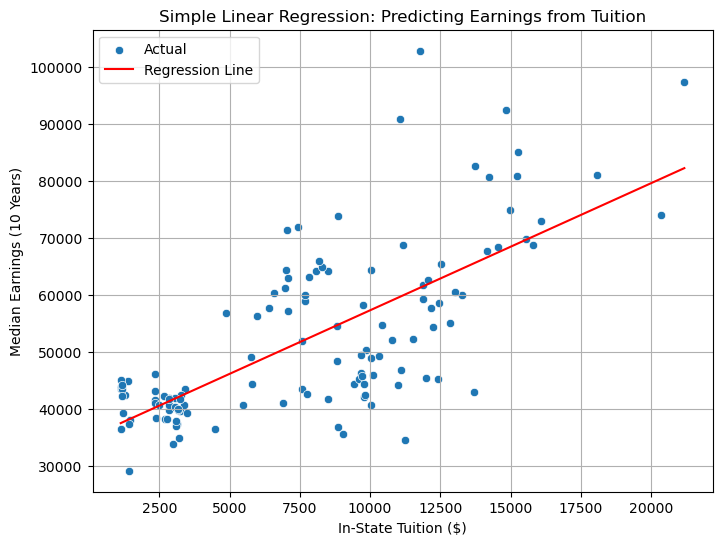

Regression Slope (Coefficient): 2.2267
Regression Intercept: 35026.6135
R² Score: 0.5021


In [7]:
# Select tuition as input and earnings as output
X = df[["In-State Tuition"]]
y = df["Median Earnings (10 yrs)"]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict earnings based on tuition
df["Predicted Earnings"] = model.predict(X)

# Plot regression
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["In-State Tuition"], y=df["Median Earnings (10 yrs)"], label="Actual")
sns.lineplot(x=df["In-State Tuition"], y=df["Predicted Earnings"], color="red", label="Regression Line")
plt.title("Simple Linear Regression: Predicting Earnings from Tuition")
plt.xlabel("In-State Tuition ($)")
plt.ylabel("Median Earnings (10 Years)")
plt.legend()
plt.grid(True)
plt.show()

# Output model coefficients
print(f"Regression Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Regression Intercept: {model.intercept_:.4f}")

# R-squared
r2 = r2_score(y, df["Predicted Earnings"])
print(f"R² Score: {r2:.4f}")